In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()

df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

df.lot_frontage.is.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.is.na %>% count()

n
2433


n
486


In [3]:
df = kaggle.house.groupDataFrame(df.lot_frontage)
df.na = kaggle.house.groupDataFrame(df.lot_frontage.is.na)

df %>%
nest %>%
left_join(df.na %>% nest %>% rename(data.new=data), by='Split.Condition') %>%
mutate(mod = map(data, ~lm(LotFrontage.Log ~ LotArea.Log, .))) %>% 
mutate(
    tidy = map(mod, broom::tidy),
    glance = map(mod, broom::glance),
    augment = map(mod, broom::augment),
    LotFrontage.Log.Pred = map2(mod, data.new, predict)
) %>%
arrange(Split.Condition) -> models

models %>% print

# A tibble: 9 x 8
                              Split.Condition                data
                                        <chr>              <list>
1               1.1 Somerst Neighb. Reg Shape <tibble [113 x 93]>
2           1.2 Somerst Neighb. non-Reg Shape  <tibble [49 x 93]>
3  2.1.1.1 Reg Shape non-2Story Garage Detchd <tibble [452 x 93]>
4  2.1.1.2 Reg Shape non-2Story Garage Attchd <tibble [605 x 93]>
5 2.1.1.3 Reg Shape non-2Story Garage Another <tibble [154 x 93]>
6                      2.1.2 Reg Shape 2Story <tibble [403 x 93]>
7           2.2.1 non-Reg Shape Corner Config <tibble [123 x 93]>
8           2.2.2 non-Reg Shape Inside Config <tibble [433 x 93]>
9          2.2.3 non-Reg Shape Another Config <tibble [101 x 93]>
# ... with 6 more variables: data.new <list>, mod <list>, tidy <list>,
#   glance <list>, augment <list>, LotFrontage.Log.Pred <list>


In [4]:
models %>% select(Split.Condition, tidy) %>% unnest %>% head

Split.Condition,term,estimate,std.error,statistic,p.value
1.1 Somerst Neighb. Reg Shape,(Intercept),-3.2500195,0.09679394,-33.5766836,5.755464e-60
1.1 Somerst Neighb. Reg Shape,LotArea.Log,0.8295389,0.01097842,75.5608461,2.771905e-97
1.2 Somerst Neighb. non-Reg Shape,(Intercept),-0.7273705,0.81326468,-0.8943835,3.756741e-01
1.2 Somerst Neighb. non-Reg Shape,LotArea.Log,0.5424687,0.09037471,6.0024397,2.668880e-07
2.1.1.1 Reg Shape non-2Story Garage Detchd,(Intercept),1.1403487,0.22618328,5.0417019,6.700296e-07
2.1.1.1 Reg Shape non-2Story Garage Detchd,LotArea.Log,0.3300755,0.02515860,13.1197870,1.589916e-33


In [5]:
models %>% select(Split.Condition, glance) %>% unnest %>% head

Split.Condition,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1.1 Somerst Neighb. Reg Shape,0.9809293,0.9807575,0.06516072,5709.44146,2.771905e-97,2,149.26043,-292.52086,-284.33870,0.471297,111
1.2 Somerst Neighb. non-Reg Shape,0.4339346,0.4218907,0.30995755,36.02928,2.668880e-07,2,-11.11233,28.22466,33.90012,4.515463,47
2.1.1.1 Reg Shape non-2Story Garage Detchd,0.2766771,0.2750697,0.14934222,172.12881,1.589916e-33,2,219.12671,-432.25342,-419.91237,10.036394,450
2.1.1.2 Reg Shape non-2Story Garage Attchd,0.7336161,0.7331744,0.14745037,1660.65074,2.340109e-175,2,300.67335,-595.34669,-582.13101,13.110192,603
2.1.1.3 Reg Shape non-2Story Garage Another,0.6177439,0.6152290,0.22392848,245.63916,1.486310e-33,2,12.94002,-19.88004,-10.76918,7.621882,152
2.1.2 Reg Shape 2Story,0.8686114,0.8682838,0.17843507,2651.01619,7.967247e-179,2,123.75306,-241.50612,-229.50931,12.767468,401


In [6]:
models %>% select(Split.Condition, augment) %>% unnest %>% head

Split.Condition,LotFrontage.Log,LotArea.Log,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
1.1 Somerst Neighb. Reg Shape,4.317488,9.218705,4.397256,0.007668166,-0.07976739,0.01384877,0.06500663,0.0106702200,-1.2327295
1.1 Somerst Neighb. Reg Shape,4.430817,9.314340,4.476588,0.008341310,-0.04577140,0.01638690,0.06530816,0.0041786387,-0.7082656
1.1 Somerst Neighb. Reg Shape,3.178054,7.880426,3.287101,0.011801764,-0.10904718,0.03280365,0.06459682,0.0491043561,-1.7016540
1.1 Somerst Neighb. Reg Shape,4.356709,9.230731,4.407231,0.007748208,-0.05052253,0.01413939,0.06527619,0.0043728867,-0.7808929
1.1 Somerst Neighb. Reg Shape,3.688879,8.281724,3.619993,0.008356426,0.06888642,0.01644635,0.06512033,0.0095003347,1.0659792
1.1 Somerst Neighb. Reg Shape,4.317488,9.145802,4.336779,0.007215710,-0.01929115,0.01226271,0.06543006,0.0005508309,-0.2978871


In [56]:
models %>% 
select(Split.Condition, data.new, LotFrontage.Log.Pred) %>% 
unnest %>% 
select(Split.Condition, LotArea, LotArea.Log, LotFrontage.Log.Pred) %>%
mutate(LotFrontage.Pred=exp(LotFrontage.Log.Pred)) %>%
head

Split.Condition,LotArea,LotArea.Log,LotFrontage.Log.Pred,LotFrontage.Pred
1.1 Somerst Neighb. Reg Shape,2117,7.657755,3.102387,22.25099
1.1 Somerst Neighb. Reg Shape,2117,7.657755,3.102387,22.25099
1.1 Somerst Neighb. Reg Shape,7050,8.860783,4.100345,60.36111
1.1 Somerst Neighb. Reg Shape,2651,7.882692,3.288981,26.81551
1.1 Somerst Neighb. Reg Shape,2117,7.657755,3.102387,22.25099
1.1 Somerst Neighb. Reg Shape,7500,8.922658,4.151673,63.54021


In [80]:
models %>% 
select(Split.Condition, data, augment) %>% 
unnest %>%
rename(LotFrontage.Log.Pred = .fitted) %>%
mutate(LotFrontage.Pred=exp(LotFrontage.Log.Pred)) -> d1

models %>% 
select(Split.Condition, data.new, LotFrontage.Log.Pred) %>%
unnest %>%
mutate(LotFrontage.Pred=exp(LotFrontage.Log.Pred)) -> d2


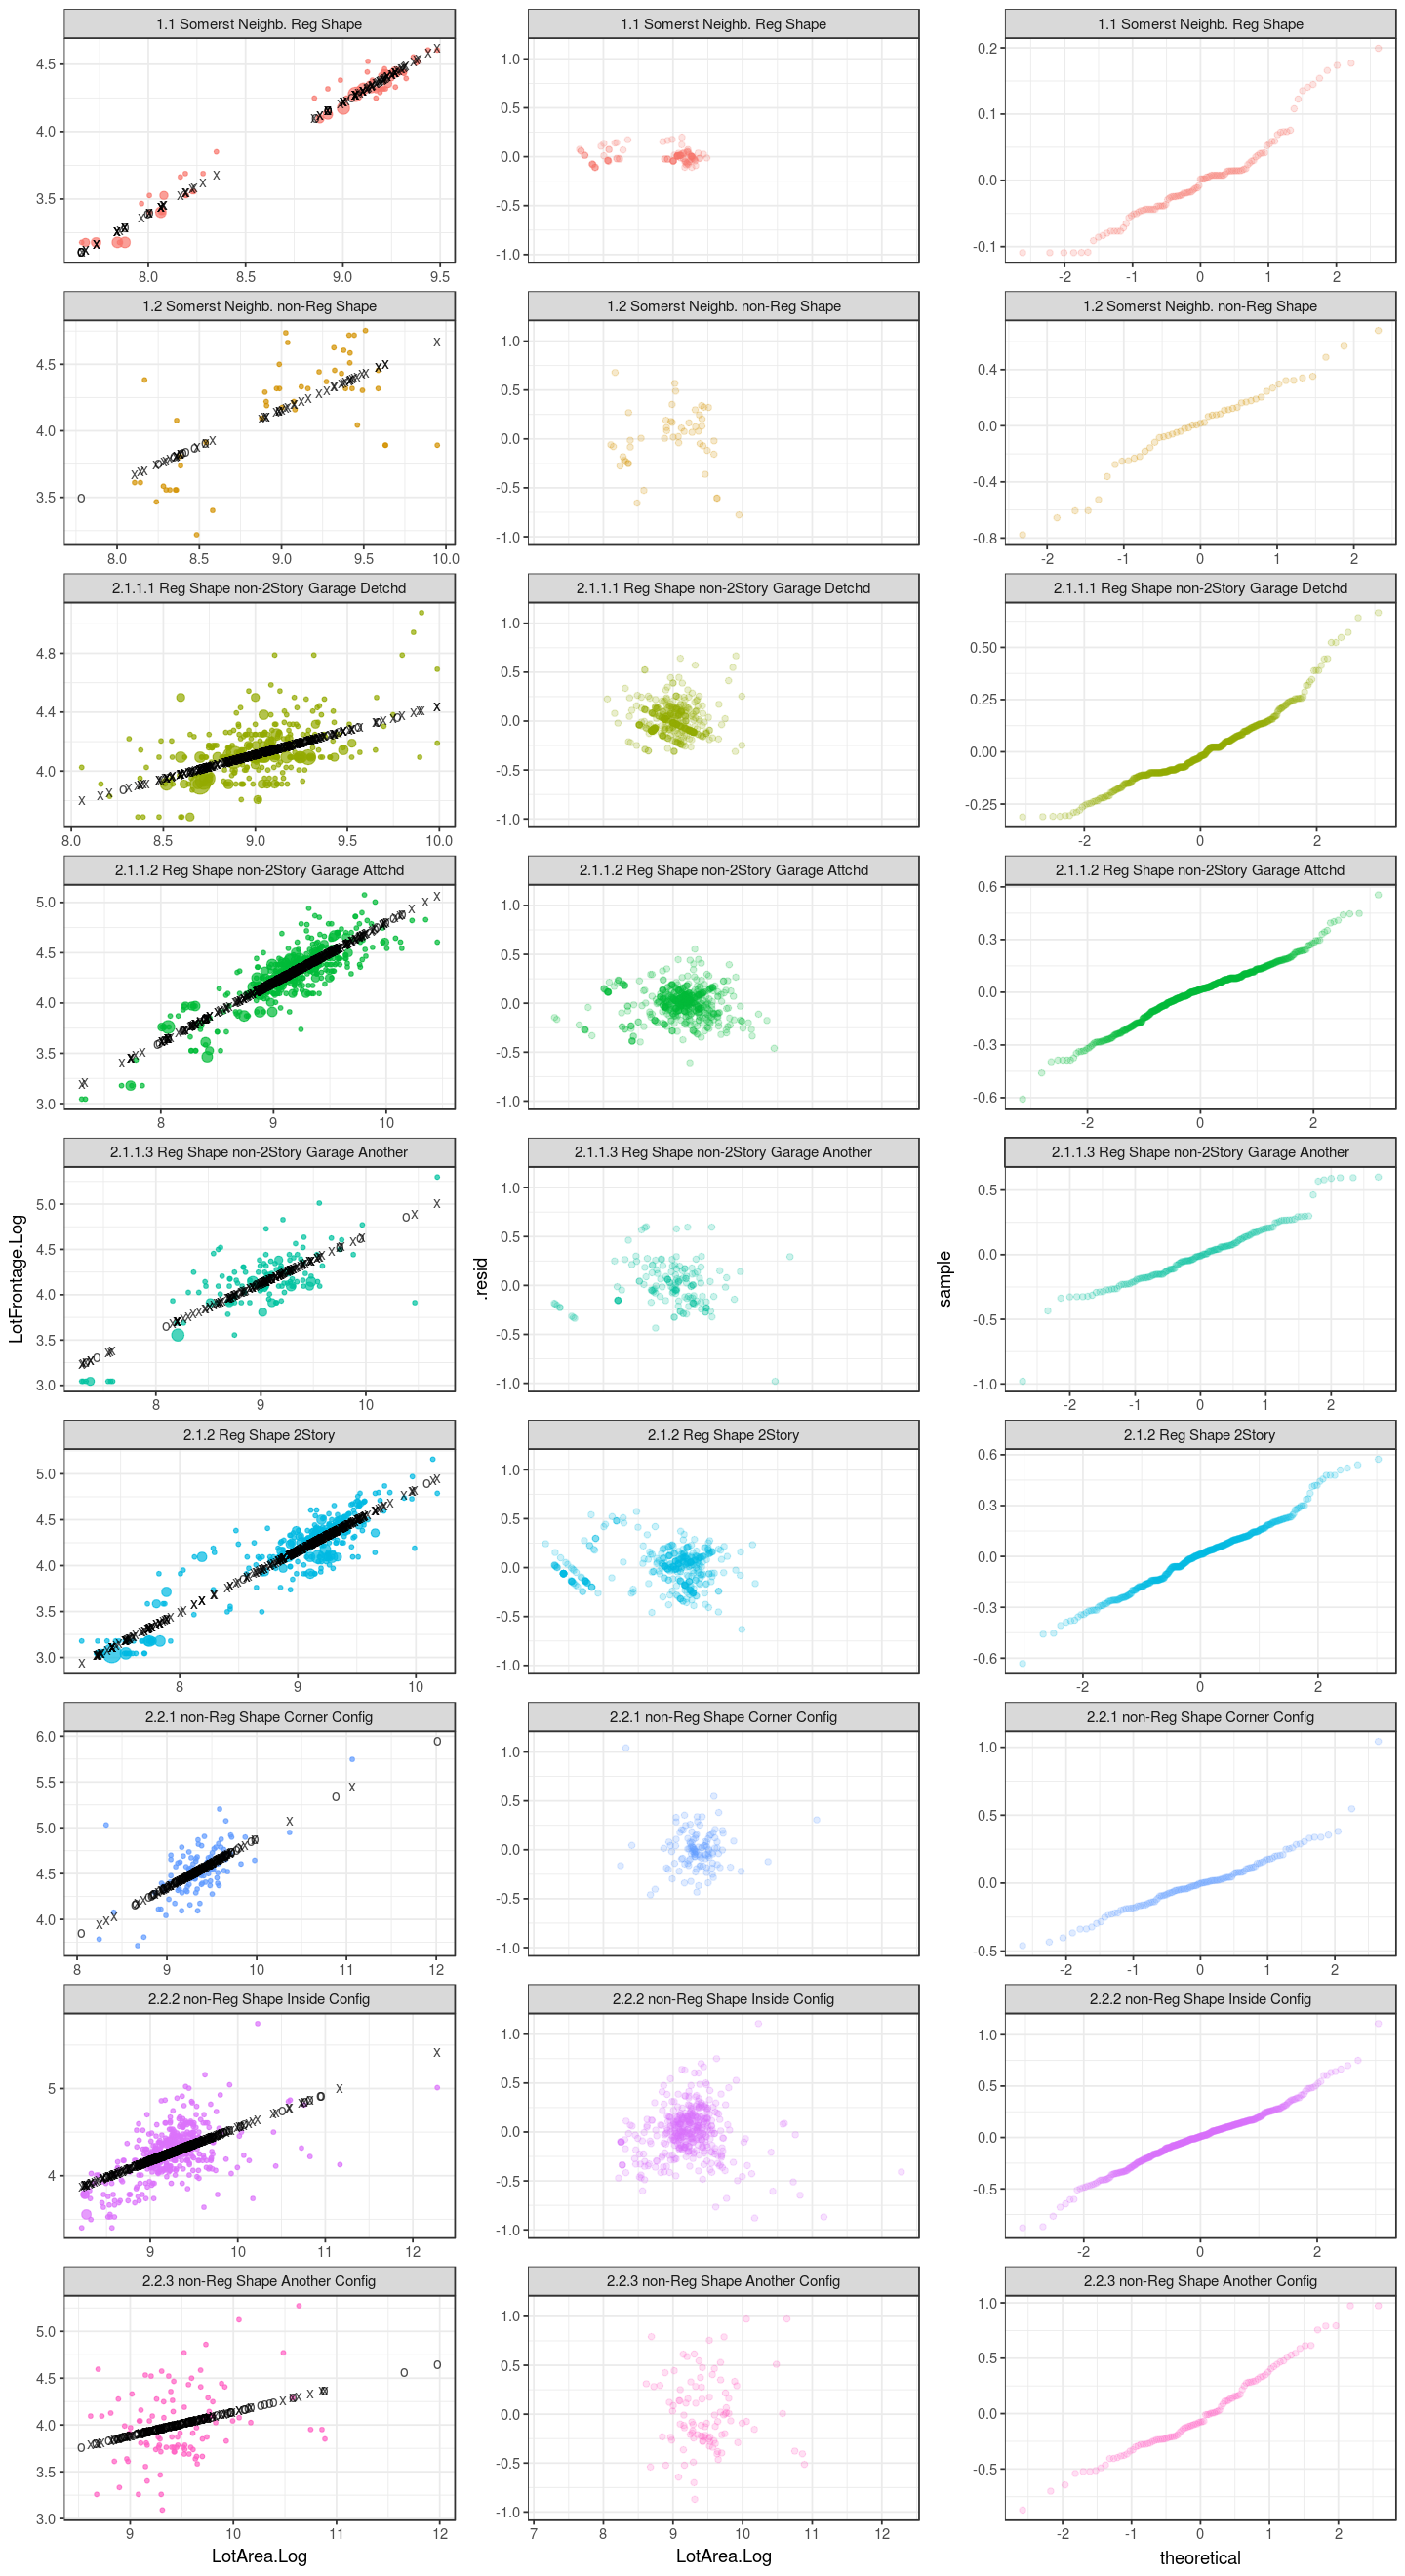

In [67]:
options(repr.plot.width = 12, repr.plot.height = 22)

p1 <- ggplot() +
geom_count(data=d1, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.7) +
geom_point(data=d1, aes(x=LotArea.Log, y=LotFrontage.Log.Pred), alpha=0.7, color="black", shape='x', size=3) +
geom_point(data=d2, aes(x=LotArea.Log, y=LotFrontage.Log.Pred), alpha=0.7, color="black", shape='o', size=3) +
facet_wrap(~Split.Condition, ncol=1, scales="free") +
theme_bw() +
theme(
    legend.position = "none", 
    legend.direction = "vertical",
    strip.text.x = element_text(size = 9))

p2 <- ggplot() +
geom_point(data=d1, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
facet_wrap(~Split.Condition, ncol=1) +
theme_bw()+
theme(
    legend.position = "none", 
    legend.direction = "vertical",
    strip.text.x = element_text(size = 9))


p3 <- ggplot() +
stat_qq(data=d1, aes(sample=.resid, colour=Split.Condition), distribution=qnorm, alpha=0.2) +
facet_wrap(~Split.Condition, ncol=1, scales="free") +
theme_bw()+
theme(
    legend.position = "none", 
    legend.direction = "vertical",
    strip.text.x = element_text(size = 9))


p <- list(p1, p2, p3) %>% purrr::map(~ggplot_gtable(ggplot_build(.)))

do.call(cbind.gtable, p) %>% grid.arrange()

In [81]:
d1 %>%  head

Split.Condition,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,LotFrontage.Log1,LotArea.Log1,LotFrontage.Log.Pred,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid,LotFrontage.Pred
1.1 Somerst Neighb. Reg Shape,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,⋯,4.317488,9.218705,4.397256,0.007668166,-0.07976739,0.01384877,0.06500663,0.0106702200,-1.2327295,81.22763
1.1 Somerst Neighb. Reg Shape,20,FV,84,11096,Pave,NA,Reg,Lvl,AllPub,⋯,4.430817,9.314340,4.476588,0.008341310,-0.04577140,0.01638690,0.06530816,0.0041786387,-0.7082656,87.93415
1.1 Somerst Neighb. Reg Shape,160,FV,24,2645,Pave,Pave,Reg,Lvl,AllPub,⋯,3.178054,7.880426,3.287101,0.011801764,-0.10904718,0.03280365,0.06459682,0.0491043561,-1.7016540,26.76516
1.1 Somerst Neighb. Reg Shape,20,RL,78,10206,Pave,NA,Reg,Lvl,AllPub,⋯,4.356709,9.230731,4.407231,0.007748208,-0.05052253,0.01413939,0.06527619,0.0043728867,-0.7808929,82.04200
1.1 Somerst Neighb. Reg Shape,160,FV,40,3951,Pave,Pave,Reg,Lvl,AllPub,⋯,3.688879,8.281724,3.619993,0.008356426,0.06888642,0.01644635,0.06512033,0.0095003347,1.0659792,37.33731
1.1 Somerst Neighb. Reg Shape,60,FV,75,9375,Pave,NA,Reg,Lvl,AllPub,⋯,4.317488,9.145802,4.336779,0.007215710,-0.01929115,0.01226271,0.06543006,0.0005508309,-0.2978871,76.46088


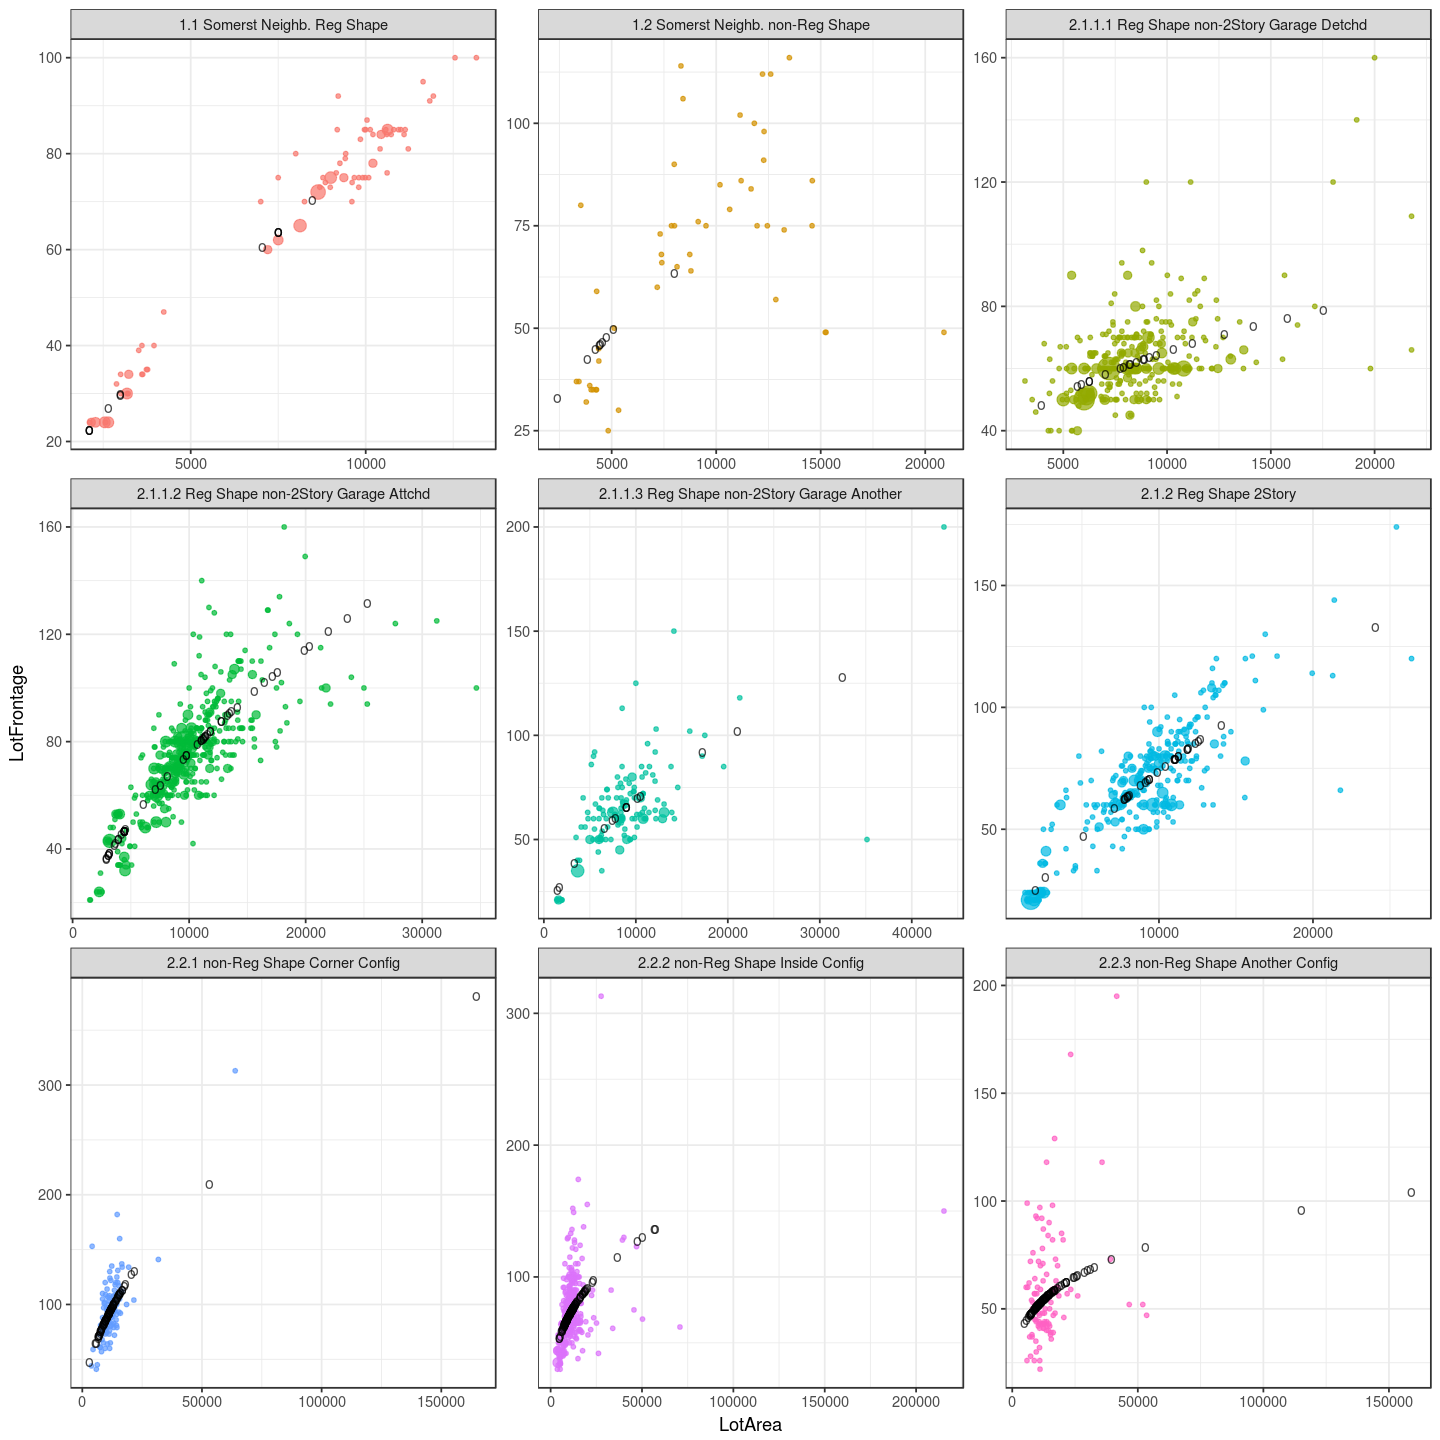

In [86]:
options(repr.plot.width = 12, repr.plot.height = 12)

ggplot() +
geom_count(data=d1, aes(x=LotArea, y=LotFrontage, colour = Split.Condition), alpha=0.7) +
geom_point(data=d2, aes(x=LotArea, y=LotFrontage.Pred), alpha=0.7, color="black", shape='o', size=3) +
facet_wrap(~Split.Condition, scales="free") +
theme_bw() +
theme(legend.position = "none")